Loading and preparing images...
Images prepared.
Calculating histograms...
Histograms calculated.

--- Histogram Comparison Scores ---

Comparing: Original vs Brightened
  Correlation: -0.0439 (Higher is more similar, Range [-1, 1], Target: 1)
  Bhattacharyya: 0.6419 (Lower is more similar, Range [0, 1], Target: 0)

Comparing: Original vs Blurred
  Correlation: 0.9703 (Higher is more similar, Range [-1, 1], Target: 1)
  Bhattacharyya: 0.0963 (Lower is more similar, Range [0, 1], Target: 0)

Comparing: Brightened vs Blurred
  Correlation: -0.0574 (Higher is more similar, Range [-1, 1], Target: 1)
  Bhattacharyya: 0.6697 (Lower is more similar, Range [0, 1], Target: 0)

Displaying images and histograms...


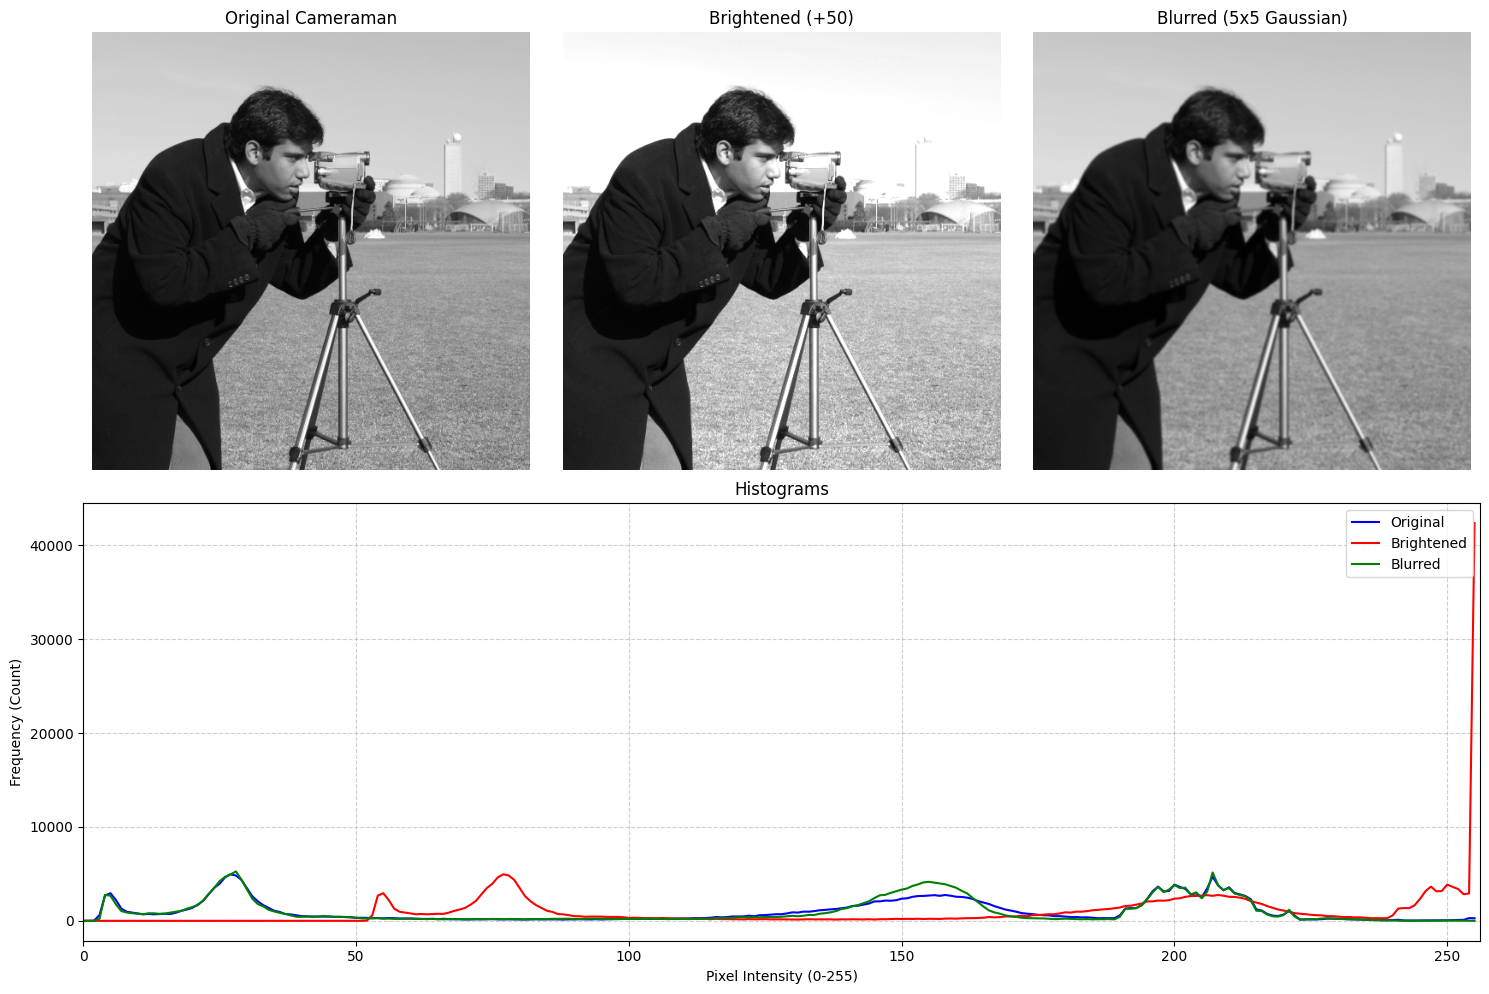


Done.


In [ ]:
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_ubyte 
import matplotlib.pyplot as plt

print("Loading and preparing images...")
sk_image = data.camera()

if sk_image.dtype != np.uint8:
    print(f"Converting image from {sk_image.dtype} to uint8")
    image_orig = img_as_ubyte(sk_image)
else:
    image_orig = sk_image

if len(image_orig.shape) == 3:
    image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

brightness_increase = 50

image_bright = cv2.add(image_orig, np.array([brightness_increase], dtype=np.uint8))



image_blurred = cv2.GaussianBlur(image_orig, (5, 5), 0)

print("Images prepared.")


print("Calculating histograms...")

hist_size = [256] 
hist_range = [0, 256] 
channels = [0] 

hist_orig = cv2.calcHist([image_orig], channels, None, hist_size, hist_range)
hist_bright = cv2.calcHist([image_bright], channels, None, hist_size, hist_range)
hist_blurred = cv2.calcHist([image_blurred], channels, None, hist_size, hist_range)


print("Histograms calculated.")

print("\n--- Histogram Comparison Scores ---")

methods = {
    "Correlation": cv2.HISTCMP_CORREL,
    "Bhattacharyya": cv2.HISTCMP_BHATTACHARYYA
}

comparisons = {
    "Original vs Brightened": (hist_orig, hist_bright),
    "Original vs Blurred": (hist_orig, hist_blurred),
    "Brightened vs Blurred": (hist_bright, hist_blurred)
}

results = {} 

for comp_name, (h1, h2) in comparisons.items():
    print(f"\nComparing: {comp_name}")
    results[comp_name] = {}
    for method_name, method_code in methods.items():
        score = cv2.compareHist(h1, h2, method_code)
        results[comp_name][method_name] = score

        
        interpretation = ""
        if method_name == "Correlation":
            interpretation = "(Higher is more similar, Range [-1, 1], Target: 1)"
        elif method_name == "Bhattacharyya":
            interpretation = "(Lower is more similar, Range [0, 1], Target: 0)"


        print(f"  {method_name}: {score:.4f} {interpretation}")



print("\nDisplaying images and histograms...")
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.imshow(image_orig, cmap='gray')
plt.title('Original Cameraman')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_bright, cmap='gray')
plt.title(f'Brightened (+{brightness_increase})')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_blurred, cmap='gray')
plt.title('Blurred (5x5 Gaussian)')
plt.axis('off')


plt.subplot(2, 1, 2) 
plt.plot(hist_orig, color='blue', label='Original')
plt.plot(hist_bright, color='red', label='Brightened')
plt.plot(hist_blurred, color='green', label='Blurred')

plt.title('Histograms')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency (Count)')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("\nDone.")